In [1]:
from qiskit.algorithms import Shor
from qiskit.utils import QuantumInstance
from qiskit import QuantumCircuit, Aer , execute
from qiskit.tools.visualization import plot_histogram

import numpy as np

In [2]:
backend = Aer.get_backend('qasm_simulator')

In [3]:
quantum_instance = QuantumInstance(backend, shots=2048)

In [4]:
N = 15

In [5]:
shor_algo = Shor(quantum_instance=quantum_instance)

C:\condaenv\envs\qenv\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The Shor class is deprecated as of Qiskit Terra 0.22.0 and will be removed
        no sooner than 3 months after the release date.
        It is replaced by the tutorial at https://qiskit.org/textbook/ch-algorithms/shor.html
        
  """Entry point for launching an IPython kernel.


In [6]:
result = shor_algo.factor(N)
print(f"{N}  Factors {result.factors[0]}.")

15  Factors [3, 5].


In [7]:
def ModularExponentiationFunc(a, power):
    U = QuantumCircuit(4)
    for iteration in range(power):
        U.swap(2,3)
        U.swap(1,2)
        U.swap(0,1)
        
        for q in range(4):
            U.x(q)
            
    U = U.to_gate()
    U.name = "%i^%i mod 15" %(a,power)
    c_U = U.control()
    return c_U

In [8]:
n_count = 8
a = 7

def QuantumFourierTransformDagger(n):

    qc = QuantumCircuit(n)
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    
    for j in range(n):
        for m in range(j):
            qc.cu1(-np.pi/float(2**(j-m)), m , j)
        
        qc.h(j)

    qc.name = "QFT dagger"
    return qc

In [9]:
qc = QuantumCircuit(n_count + 4, n_count)

for q in range(n_count):
    qc.h(q)

qc.x(3+n_count)


for q in range(n_count):
    qc.append(ModularExponentiationFunc(a,2**q), [q]+[i+n_count for i in range(4)])
    
qc.append(QuantumFourierTransformDagger(n_count), range(n_count))

qc.measure(range(n_count), range(n_count))

qc.draw('text')

C:\condaenv\envs\qenv\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: The QuantumCircuit.cu1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cp method instead, which acts identically.
  if sys.path[0] == "":


┌───┐                                                            »
 q_0: ┤ H ├───────■────────────────────────────────────────────────────»
      ├───┤       │                                                    »
 q_1: ┤ H ├───────┼──────────────■─────────────────────────────────────»
      ├───┤       │              │                                     »
 q_2: ┤ H ├───────┼──────────────┼──────────────■──────────────────────»
      ├───┤       │              │              │                      »
 q_3: ┤ H ├───────┼──────────────┼──────────────┼──────────────■───────»
      ├───┤       │              │              │              │       »
 q_4: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼───────»
      ├───┤       │              │              │              │       »
 q_5: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼───────»
      ├───┤       │              │              │              │       »
 q_6: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼───────»
      ├───┤       │              │              │              │       »
 q_7: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼───────»
      └───┘┌──────┴──────┐┌──────┴──────┐┌──────┴──────┐┌──────┴──────┐»
 q_8: ─────┤0            ├┤0            ├┤0            ├┤0            ├»
           │             ││             ││             ││             │»
 q_9: ─────┤1            ├┤1            ├┤1            ├┤1            ├»
           │  7^1 mod 15 ││  7^2 mod 15 ││  7^4 mod 15 ││  7^8 mod 15 │»
q_10: ─────┤2            ├┤2            ├┤2            ├┤2            ├»
      ┌───┐│             ││             ││             ││             │»
q_11: ┤ X ├┤3            ├┤3            ├┤3            ├┤3            ├»
      └───┘└─────────────┘└─────────────┘└─────────────┘└─────────────┘»
 c_0: ═════════════════════════════════════════════════════════════════»
                                                                       »
 c_1: ═════════════════════════════════════════════════════════════════»
                                                                       »
 c_2: ═════════════════════════════════════════════════════════════════»
                                                                       »
 c_3: ═════════════════════════════════════════════════════════════════»
                                                                       »
 c_4: ═════════════════════════════════════════════════════════════════»
                                                                       »
 c_5: ═════════════════════════════════════════════════════════════════»
                                                                       »
 c_6: ═════════════════════════════════════════════════════════════════»
                                                                       »
 c_7: ═════════════════════════════════════════════════════════════════»
                                                                       »
«                                                                       »
« q_0: ─────────────────────────────────────────────────────────────────»
«                                                                       »
« q_1: ─────────────────────────────────────────────────────────────────»
«                                                                       »
« q_2: ─────────────────────────────────────────────────────────────────»
«                                                                       »
« q_3: ─────────────────────────────────────────────────────────────────»
«                                                                       »
« q_4: ───────■─────────────────────────────────────────────────────────»
«             │                                                         »
« q_5: ───────┼───────────────■─────────────────────────────────────────»
«             │               │                                         »
« q_6: ───────┼───────────────┼───────────────■────

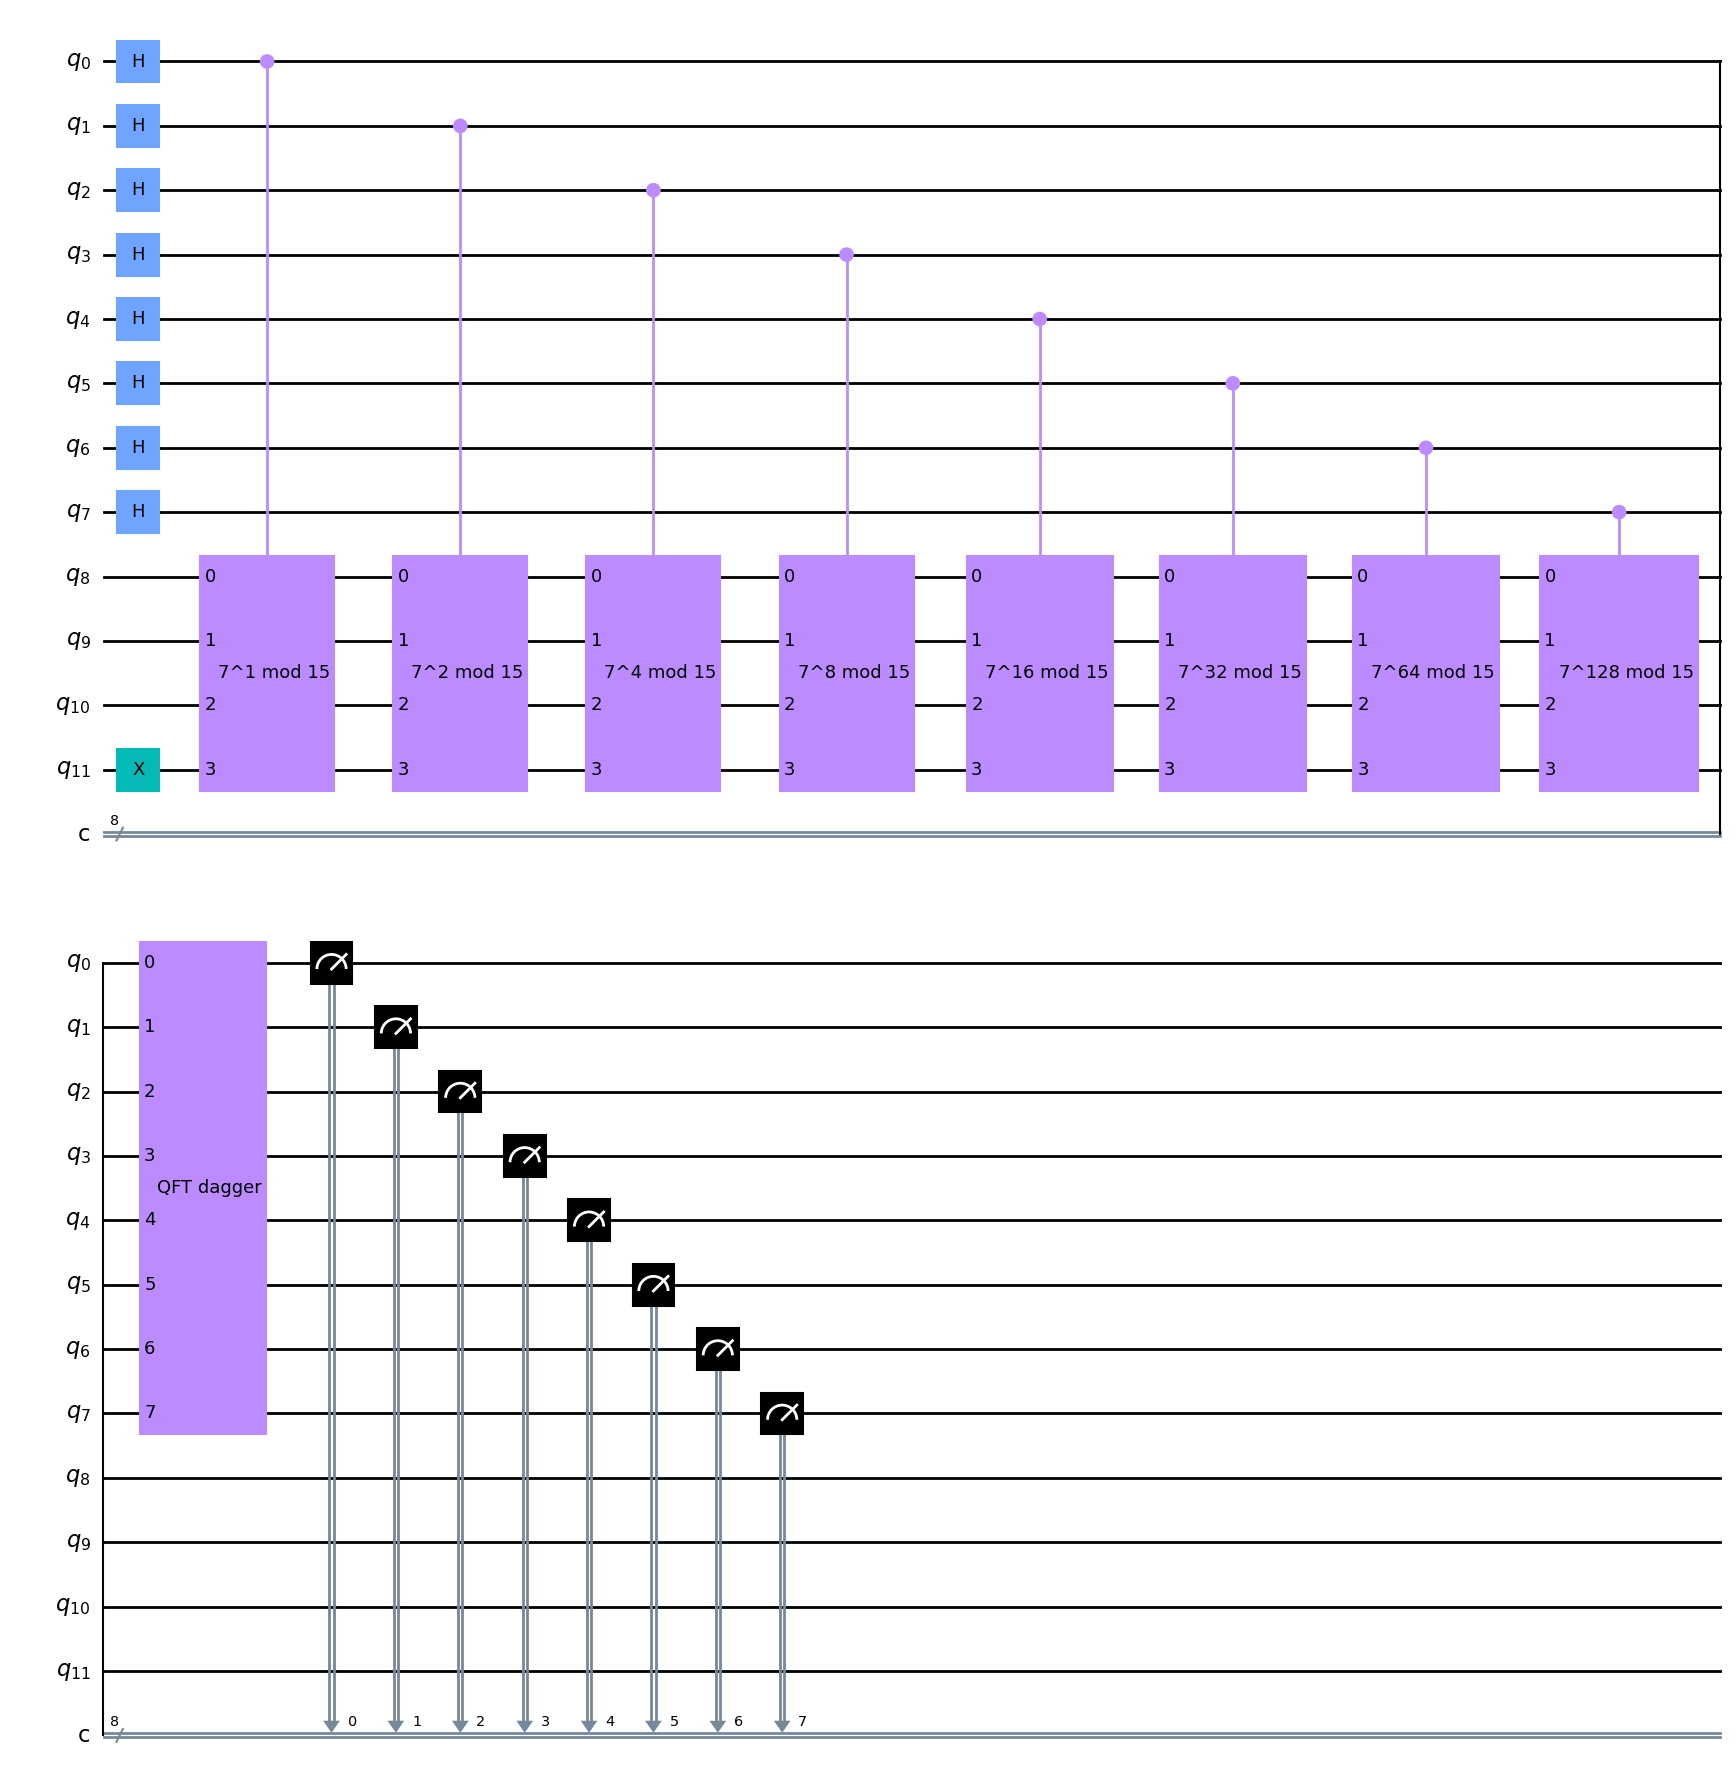

In [11]:
qc.draw('mpl')

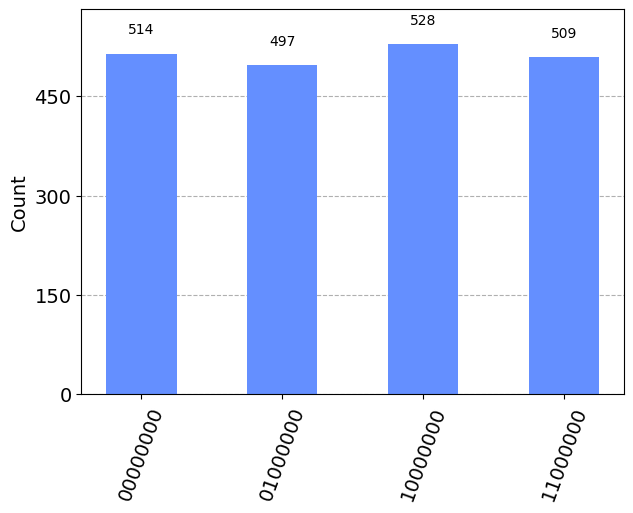

In [12]:
backend = Aer.get_backend('qasm_simulator')

results = execute(qc, backend, shots= 2048).result()

counts = results.get_counts()

plot_histogram(counts)